# Exercise 1 : 
## Question 2 :

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import math
n = 10**6    # number of samples

Méthode 1 

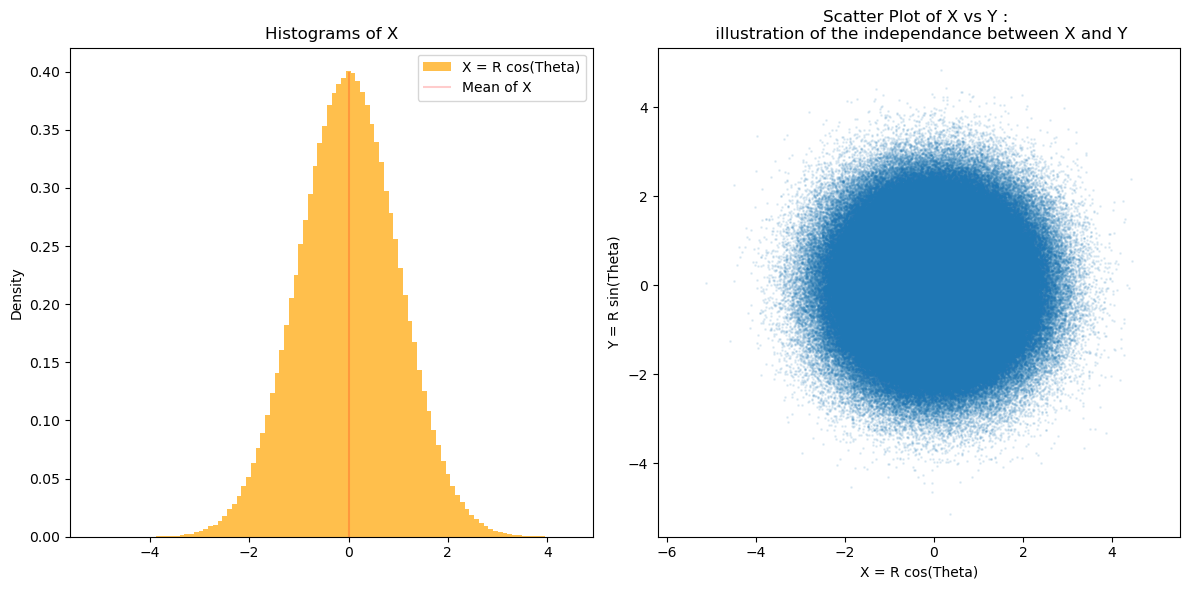

In [103]:
def sample_raleigh(number_samples):
    U = np.random.uniform(low = 0, high = 1, size = number_samples)
    return np.sqrt(-2 * np.log(1 - U))

sigma = 1    # parameter for the Raleigh distribution
samples_raleigh = np.random.rayleigh(scale = 1, 
                                     size = n)    # generate samples of the Raleigh distribution
samples_uniform = np.random.uniform(low = 0, 
                                    high = 2 * math.pi, 
                                    size = n)    # generate samples of the uniform distribution
X , Y = samples_raleigh * np.cos(samples_uniform), samples_raleigh * np.sin(samples_uniform)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

Méthode 2

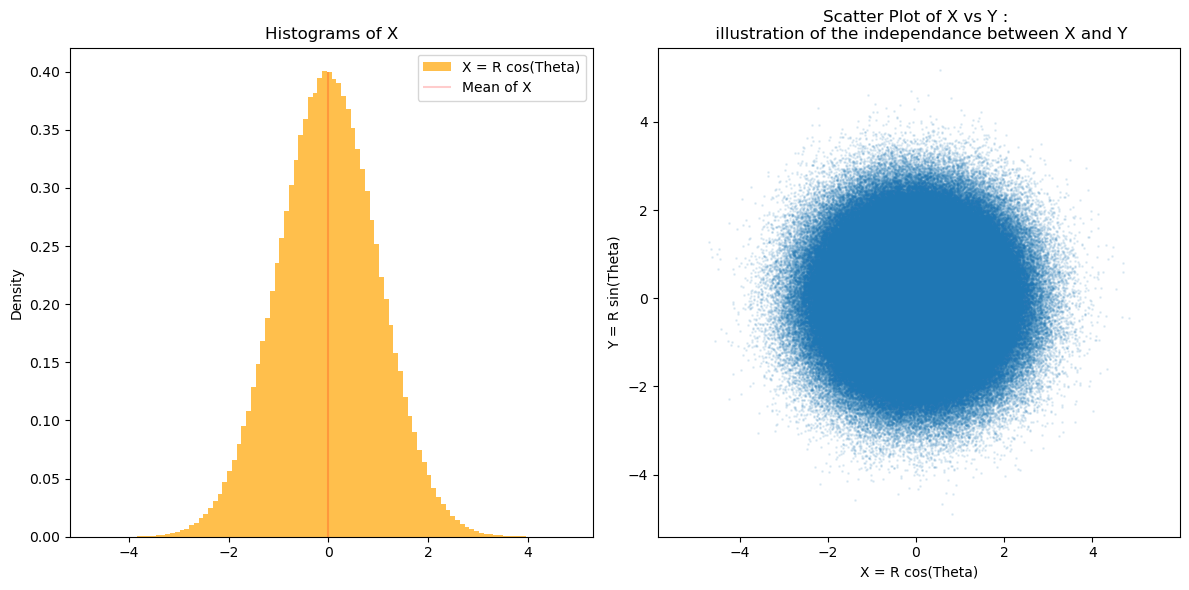

In [104]:
def sample_raleigh(number_samples):
    U = np.random.uniform(low = 0, high = 1, size = number_samples)
    return np.sqrt(-2 * np.log(1 - U))

samples_raleigh = sample_raleigh(n)    # generate samples of the Raleigh distribution
samples_uniform = np.random.uniform(low = 0, 
                                    high = 2 * math.pi, 
                                    size = n)    # generate samples of the uniform distribution
X , Y = samples_raleigh * np.cos(samples_uniform), samples_raleigh * np.sin(samples_uniform)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

The scatter plot allows us to visualize the points $(X,Y)$. There is no discernible pattern and the points are distributed randomly, it indicates that X and Y are independent.

## Question 3:

### c.

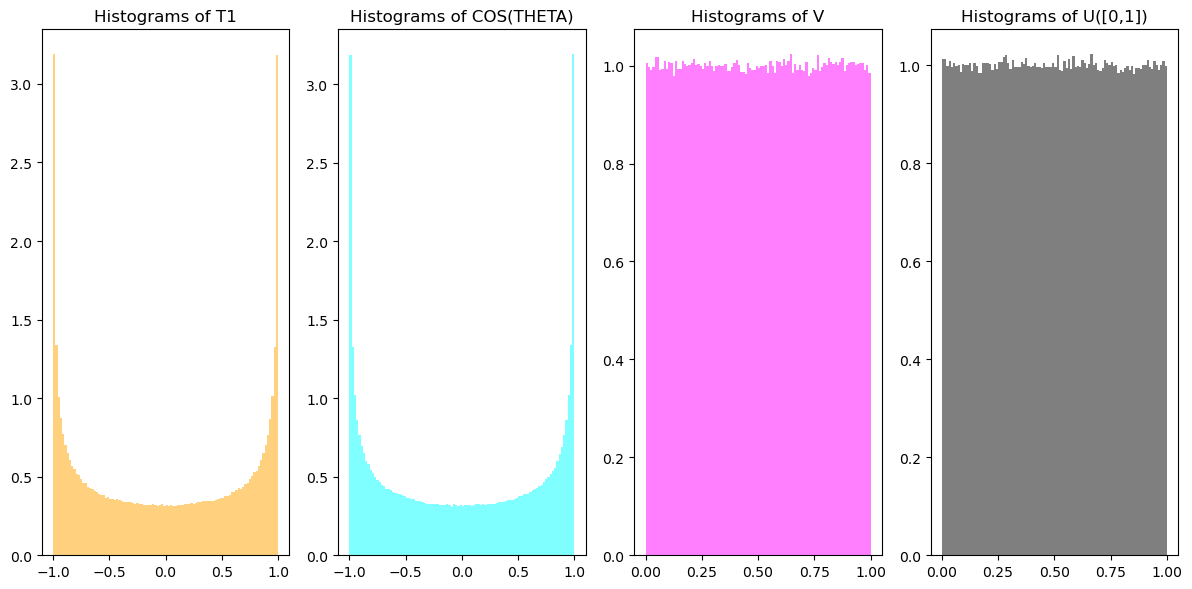

In [105]:
def condition_Marsaglia_Bray_algorithm(number_of_sample):
    sample = []
    for _ in range(number_of_sample):
        while True:
            U1 = np.random.uniform(low = -1, high = 1)
            U2 = np.random.uniform(low = -1, high = 1)
            V1 , V2 = 2 * U1 - 1, 2 * U2 - 1
            if V1 ** 2 + V2 ** 2 <= 1:
                break
        sample.append([V1, V2])
    sample = np.array(sample)
    return sample[:, 0], sample[:, 1]

V1, V2 = condition_Marsaglia_Bray_algorithm(n)    #sample V1 and V2
THETA = np.random.uniform(low = 0, high = 2 * math.pi, size = n)    # sample theta
cos_THETA = np.cos(THETA)
T1 = V1 / (np.sqrt(V1 ** 2 + V2 ** 2))    # sample T1
V = V1 ** 2 + V2 ** 2    # sample V
U = np.random.uniform(low = 0, high = 1, size = n)    # sample U

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.hist(T1, bins = 100, density = True, alpha = 0.5, color='orange')
plt.title('Histograms of T1')
plt.subplot(1, 4, 2)
plt.hist(cos_THETA, bins = 100, density = True, alpha = 0.5, color='cyan')
plt.title('Histograms of COS(THETA)')
plt.subplot(1, 4, 3)
plt.hist(V, bins = 100, density = True, alpha = 0.5, color='magenta')
plt.title('Histograms of V')
plt.subplot(1, 4, 4)
plt.hist(U, bins = 100, density = True, alpha = 0.5, color='black')
plt.title('Histograms of U([0,1])')
plt.tight_layout()
plt.show()

### d.

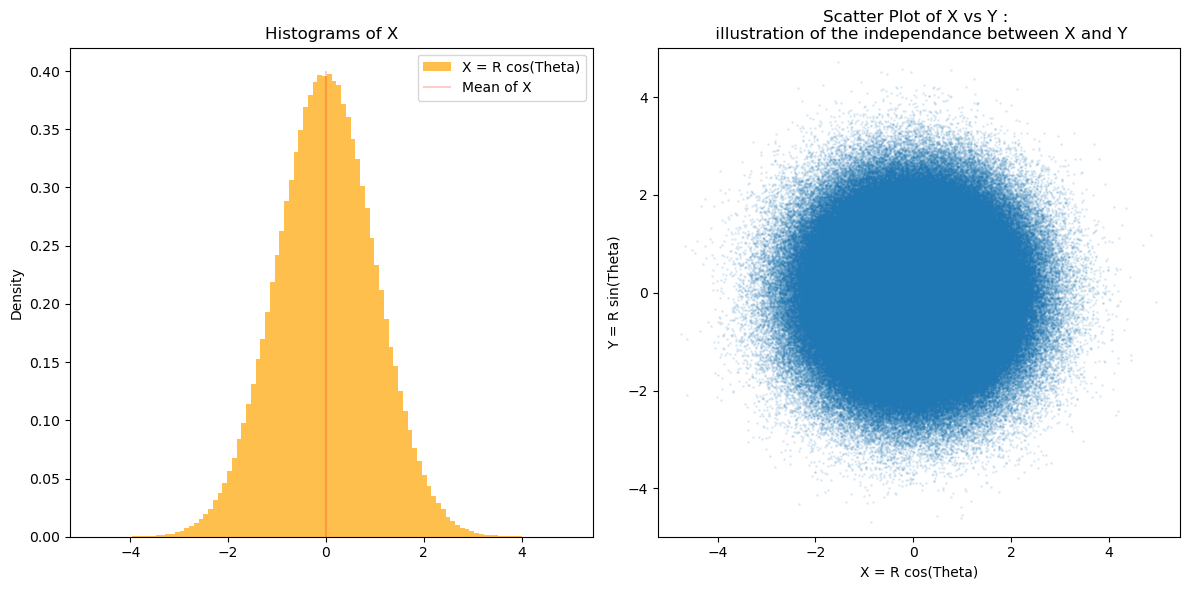

In [106]:
def algorithm1(number_of_samples):
    V1, V2 = condition_Marsaglia_Bray_algorithm(number_of_samples)    # Generate V1 and V2
    SUM = V1 ** 2 + V2 **2
    S = np.sqrt(- 2 * np.log(SUM))
    X, Y = S * (V1 / np.sqrt(SUM)), S * (V2 / np.sqrt(SUM))
    return X, Y

X , Y = algorithm1(n)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

# Exercise 2:

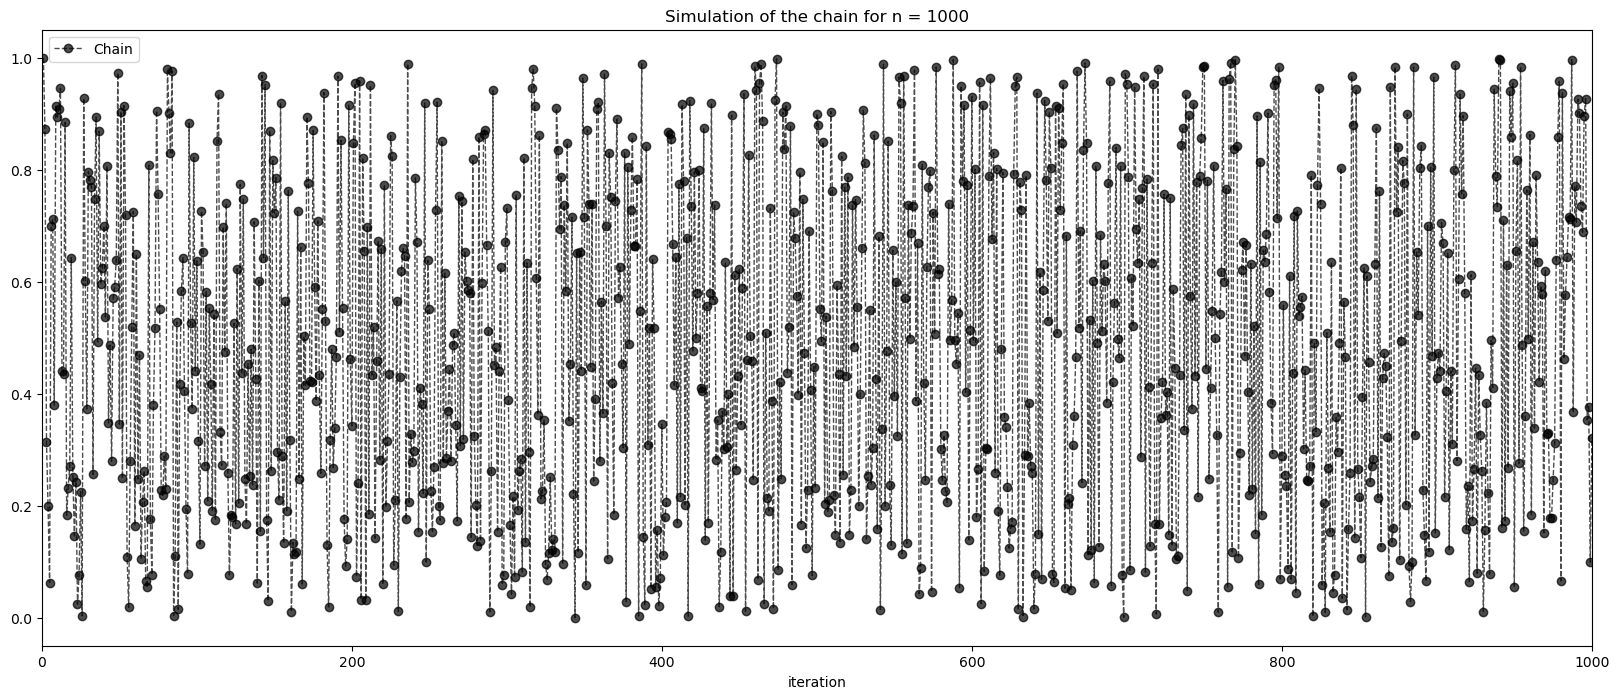

In [107]:
# Simulate the chain 
n = 10 ** 3
def simulate_chain(number_of_samples):
    X = [1]
    for k in range(1, number_of_samples):
        inverse = 1 / X[-1]
        if inverse.is_integer():
            U = np.random.uniform(low = 0, high = 1)
            if U < 1 - X[-1] ** 2:
                X.append(1 / (k+1))
            else:
                X.append(np.random.uniform(low = 0, high = 1))
        else:
            X.append(np.random.uniform(low = 0, high = 1))
    return X

X = simulate_chain(n)
plt.figure(figsize=(20, 8))
plt.plot(range(1, n + 1), X, color = 'black', alpha = 0.7, label = 'Chain', linewidth = 1, linestyle = '--', marker = 'o')    # markersize = 1, markerfacecolor = 'red', markeredgewidth = 1, markeredgecolor = 'blue', markevery = 1000)
plt.title(f'Simulation of the chain for n = {n}')
plt.xlabel('iteration')
plt.xlim(0, n)
plt.legend()
plt.show()

# Exercise 3 : Stochastic Gradient Learning in Neural Networks

## Question1: Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it.

In [108]:
import numpy.linalg as npl

def SGD(X, Y, learning_rate, n_epochs):
    """  Stochastic Gradient Descent Algorithm
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input samples.

    Y : array-like of shape (n_samples,)
        The target values.

    learning_rate : float or list
        The learning rate(s).

    n_epochs : int
        The number of epochs.
    
    Returns:
    --------
    w : float
        The estimated parameter
    w_list : list
        The list of estimated parameters
    """
    w_list = []
    w0 = np.random.randn(X.shape[1])
    if isinstance(learning_rate, (int, float)):
        wk = w0
        n_samples = X.shape[0]
        for _ in range(n_epochs):
            idx = np.random.randint(0,len(Y))
            y_k, x_k = Y[idx], X[idx]
            wk = wk + 2 * learning_rate * x_k * (y_k - np.dot(wk, x_k))
            wk = wk / npl.norm(wk)    # Normalization
            w_list.append(wk)
    elif len(learning_rate) == n_epochs:
        wk = w0
        n_samples = X.shape[0]
        for i in range(n_epochs):
            idx = np.random.randint(0,len(Y))
            y_k, x_k = Y[idx], X[idx]
            w_k = w_k  + 2 * learning_rate[i] * x_k * (y_k - np.dot(wk, x_k))
            wk = wk / npl.norm(w_k)    # Normalization
            w_list.append(wk)
    else:
        print("There is an issue with the learning rate")
    return w_list[-1], w_list

## Question 2:

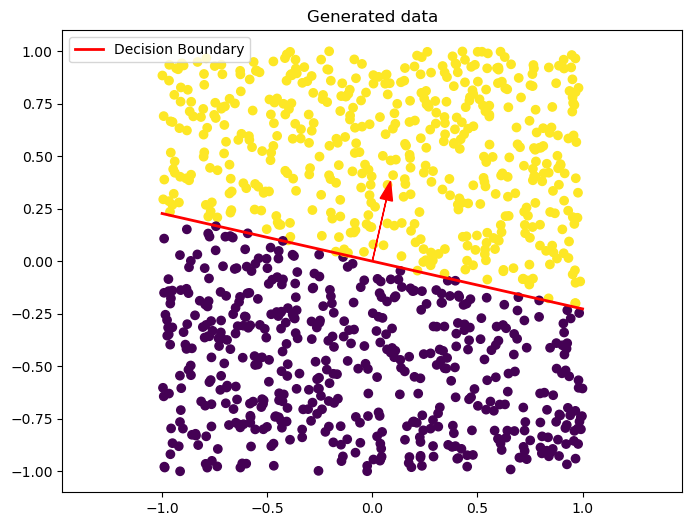

In [109]:
np.random.seed(0)
n = 1000
n_features = 2

w = np.random.uniform(-1,1,2)
w /= npl.norm(w)

X = np.random.uniform(-1, 1, (n, n_features))
y = np.sign(X @ w)

slope = lambda t: -t[0]/t[1]
x_vals = np.array([-1,1])
y_vals = slope(w) * x_vals

plt.figure(figsize = (8,6))
plt.title('Generated data')
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x_vals, y_vals, color = 'red', label = 'Decision Boundary', lw = 2)
plt.arrow(0, 0, 0.3 * w[0], 0.3 * w[1], head_width=0.06, color = 'red')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.show()

## Question3 : Test the algorithm from question1 on data generated in question2

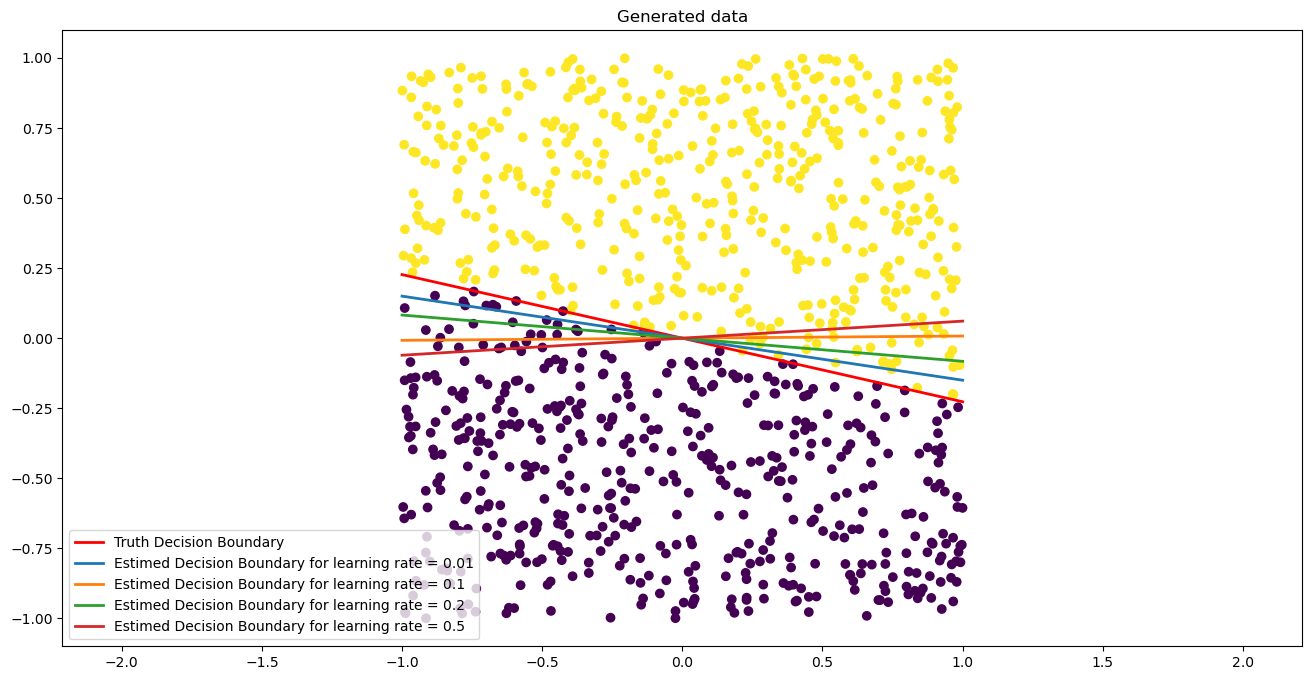

In [110]:
np.random.seed(0)
n = 1000
n_features = 2

w = np.random.uniform(-1,1,2)
w /= npl.norm(w)

X = np.random.uniform(-1, 1, (n, n_features))
y = np.sign(X @ w)

slope = lambda t: -t[0]/t[1]
x_vals = np.array([-1,1])
y_vals = slope(w) * x_vals


plt.figure(figsize = (16,8))
plt.title('Generated data')
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x_vals, y_vals, color = 'red', label = 'Truth Decision Boundary', lw = 2)
for learning_rate in [0.01, 0.1, 0.2, 0.5]:
    estim_w, estimation_of_w = SGD(
                            X = X, 
                            Y = y, 
                            learning_rate = learning_rate, 
                            n_epochs = 10 ** 5
                            )
    x_vals_estim = np.array([-1,1])
    y_vals_estim = slope(estim_w) * x_vals_estim
    plt.plot(x_vals_estim, y_vals_estim, label = f'Estimed Decision Boundary for learning rate = {learning_rate}', lw = 2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.show()

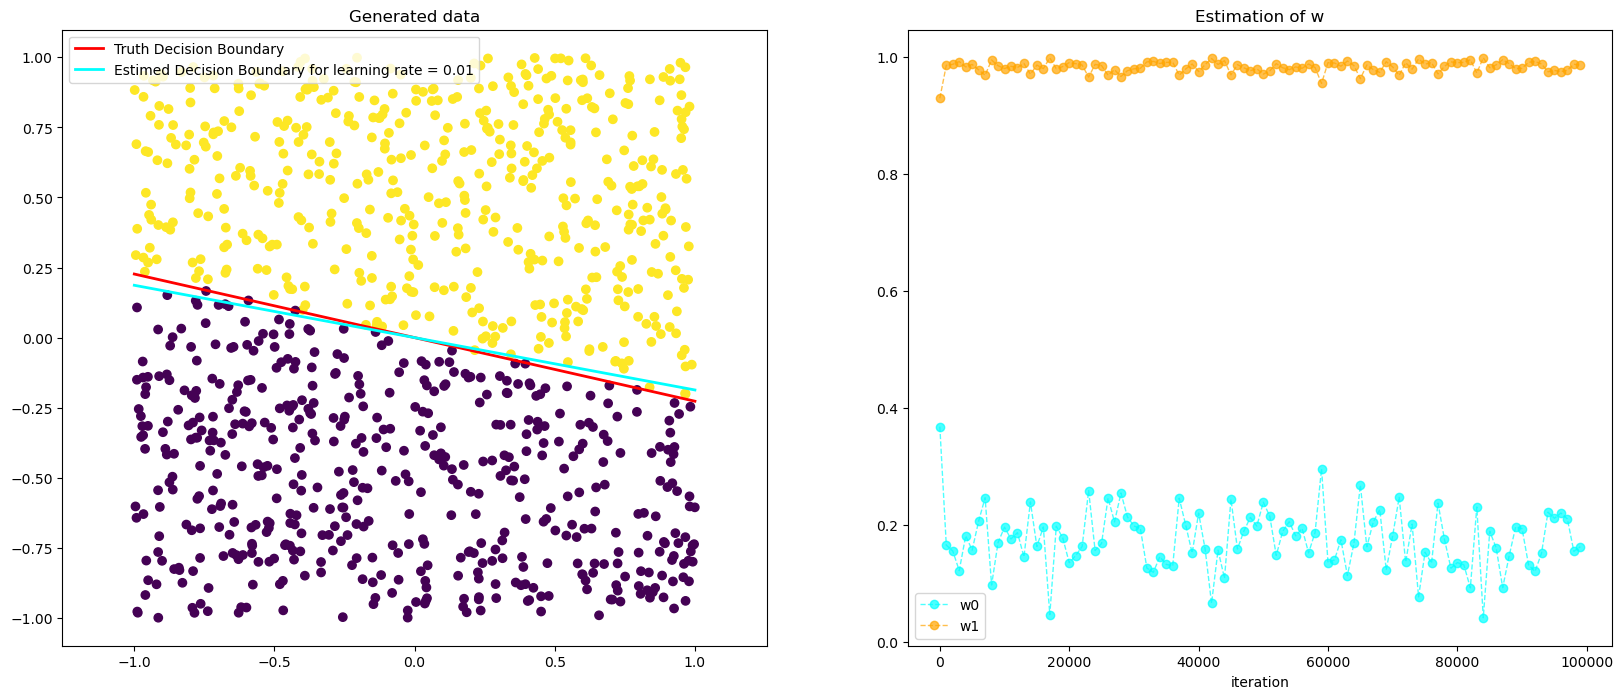

In [111]:
learning_rate = 0.01
estim_w, estimation_of_w = SGD(
                        X = X, 
                        Y = y, 
                        learning_rate = 0.01, 
                        n_epochs = 10 ** 5
                        )
x_vals_estim = np.array([-1,1])
y_vals_estim = slope(estim_w) * x_vals_estim

plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.title('Generated data')
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x_vals, y_vals, color = 'red', label = 'Truth Decision Boundary', lw = 2)
plt.plot(x_vals_estim, y_vals_estim, label = f'Estimed Decision Boundary for learning rate = {learning_rate}', color = 'cyan', lw = 2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Estimation of w')
estimation_of_w = np.array(estimation_of_w)
w0, w1 = estimation_of_w[:, 0], estimation_of_w[:, 1]
plt.plot(range(1, len(w0) + 1, 1000), w0[::1000], color = 'cyan', alpha = 0.7, linewidth = 1, linestyle = '--', marker = 'o', label = 'w0')   
plt.plot(range(1, len(w1) + 1, 1000), w1[::1000], color = 'orange', alpha = 0.7, linewidth = 1, linestyle = '--', marker = 'o', label = 'w1')  
plt.xlabel('iteration')
plt.legend()
plt.show()

## Question4 : Noising the observations

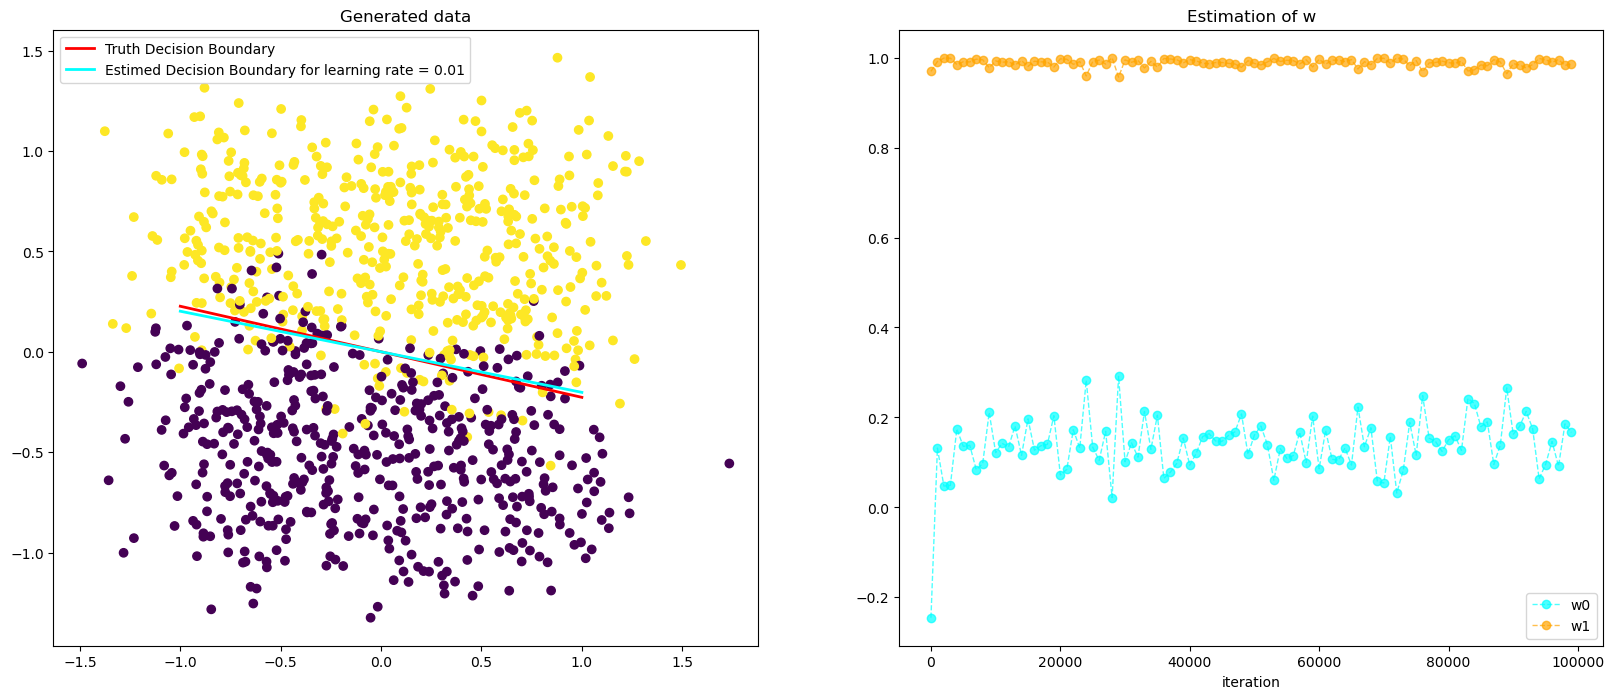

In [112]:
X_noisy = X + 0.2 * np.random.randn(n, n_features)    #noise the observations

learning_rate = 0.01
estim_w, estimation_of_w = SGD(
                        X = X_noisy, 
                        Y = y, 
                        learning_rate = 0.01, 
                        n_epochs = 10 ** 5
                        )
x_vals_estim = np.array([-1,1])
y_vals_estim = slope(estim_w) * x_vals_estim
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.title('Generated data')
plt.scatter(X_noisy[:,0], X_noisy[:,1], c = y)
plt.plot(x_vals, y_vals, color = 'red', label = 'Truth Decision Boundary', lw = 2)
plt.plot(x_vals_estim, y_vals_estim, label = f'Estimed Decision Boundary for learning rate = {learning_rate}', color = 'cyan', lw = 2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Estimation of w')
estimation_of_w = np.array(estimation_of_w)
w0, w1 = estimation_of_w[:, 0], estimation_of_w[:, 1]
plt.plot(range(1, len(w0) + 1, 1000), w0[::1000], color = 'cyan', alpha = 0.7, linewidth = 1, linestyle = '--', marker = 'o', label = 'w0')   
plt.plot(range(1, len(w1) + 1, 1000), w1[::1000], color = 'orange', alpha = 0.7, linewidth = 1, linestyle = '--', marker = 'o', label = 'w1')  
plt.xlabel('iteration')
plt.legend()
plt.show()

## Question 5:

In [113]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features.copy()
X = X.to_numpy()

y = breast_cancer_wisconsin_diagnostic.data.targets.copy() 
y['Diagnosis'] = y['Diagnosis'].map({"M": -1, "B": 1})
y = y.to_numpy().squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

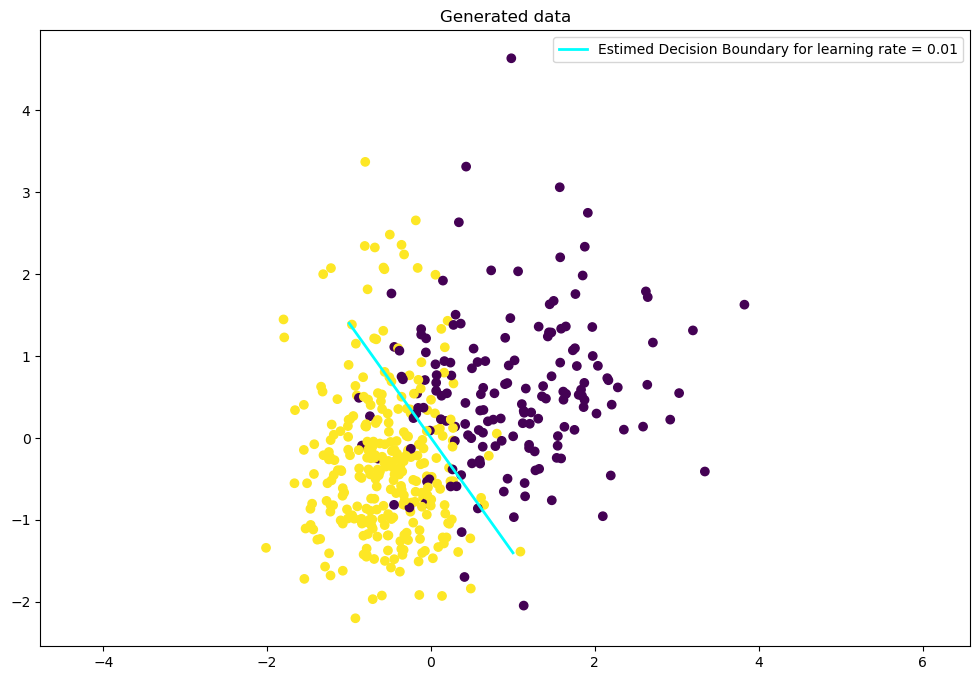

In [118]:
learning_rate = 0.01
estim_w, estimation_of_w = SGD(
                        X = X_train, 
                        Y = y_train, 
                        learning_rate = 0.01, 
                        n_epochs = 10 ** 5
                        )
x_vals_estim = np.array([-1,1])
y_vals_estim = slope(estim_w) * x_vals_estim
plt.figure(figsize = (12,8))
plt.title('Decision Boundary for the Breast Cancer Wisconsin Diagnostic (Train Data)')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.plot(x_vals_estim, y_vals_estim, label = f'Estimed Decision Boundary for learning rate = {learning_rate}', color = 'cyan', lw = 2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.show()

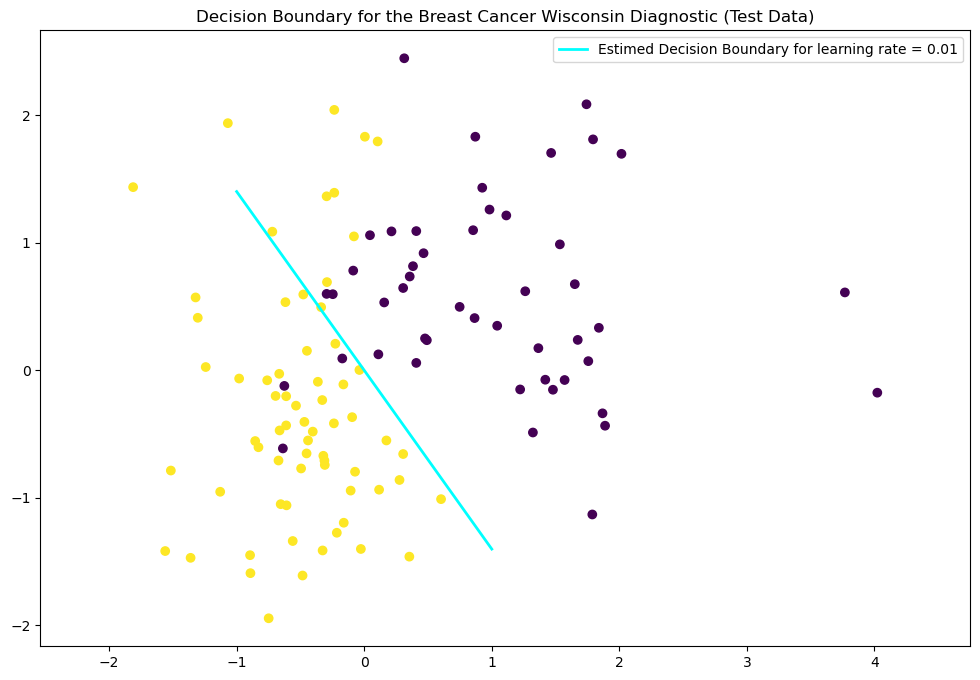

In [119]:
plt.figure(figsize = (12,8))
plt.title('Decision Boundary for the Breast Cancer Wisconsin Diagnostic (Test Data)')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.plot(x_vals_estim, y_vals_estim, label = f'Estimed Decision Boundary for learning rate = {learning_rate}', color = 'cyan', lw = 2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.legend()
plt.show()